In [1]:
import os
from config import *
from tqdm import tqdm
from utils.dataset import DrawingsDataset
from utils.data_utils import load_dataset
from matplotlib.pyplot import imshow, show

import torch
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def resnet50():
    model = models.resnet50(pretrained=False)
    
    conv1_out_channels = model.conv1.out_channels
    model.conv1 = nn.Conv2d(1, conv1_out_channels, kernel_size=3, stride=1, padding=1, bias=False)
    model.maxpool = nn.MaxPool2d(kernel_size=2)
    fc_features = model.fc.in_features
    model.fc = nn.Linear(fc_features, len(CLASSES))
    
    return model

In [3]:
model = resnet50().cuda()
model.load_state_dict(torch.load('./models/model.pth'))
dataset = load_dataset('test')

label: car
prediction: car


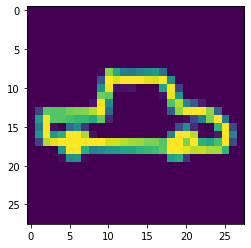

In [4]:
test_data = DrawingsDataset(mtype="test")
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)

dataiter = iter(test_loader)

drawings, labels = dataiter.next()
drawings = drawings.view(-1, 1, 28, 28).cuda()


outputs = model(drawings)
_, predicted = torch.max(outputs, 1)

i = 2

imshow(drawings[i].view(28, 28).cpu())
print(f'label: {CLASSES[labels[i]]}')
print(f'prediction: {CLASSES[predicted[i]]}')